In [ ]:
from model import Opt_GMM_Mapper
from model import Trainer

import torch
import torch.optim.lr_scheduler as lr_scheduler
import torch.optim as optim

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from gudhi.cover_complex import MapperComplex
import matplotlib.pyplot as plt
import networkx as nx

from scripts.analysis_noise import *


# Small noise

100%|██████████| 400/400 [00:16<00:00, 24.11it/s]


loss: -1.6900826706085774
topo_loss: -3.592744988435139
mode:
Indices of rows that are all zeros: (tensor([], dtype=torch.int64),)


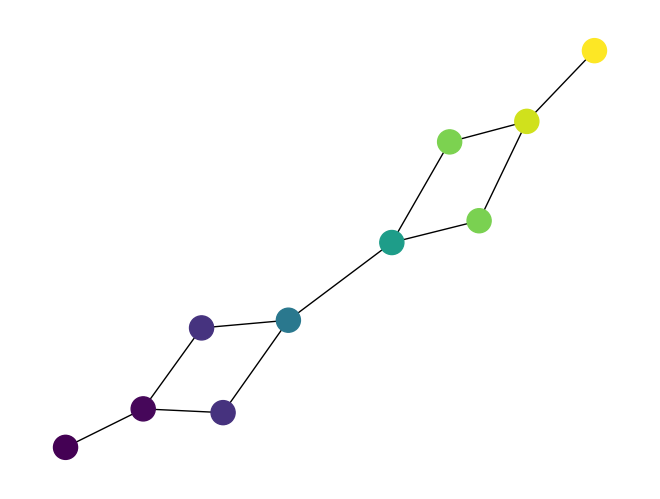

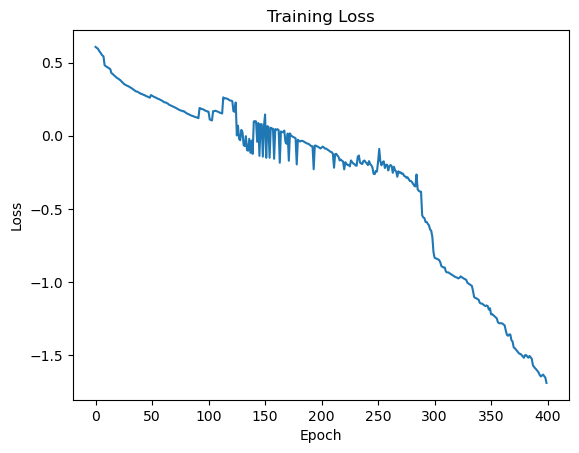

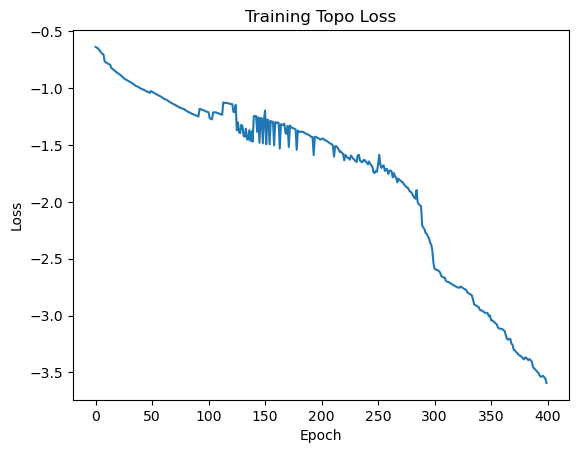

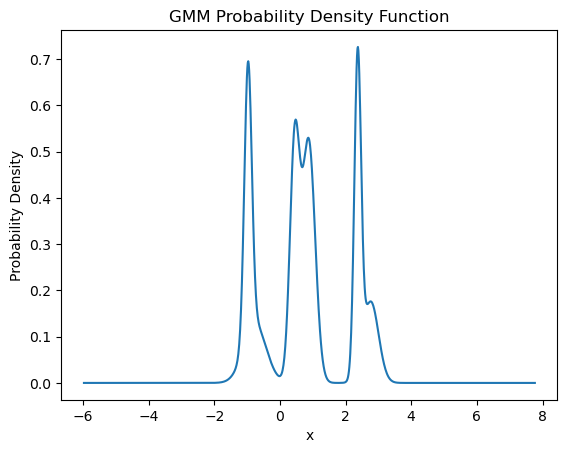

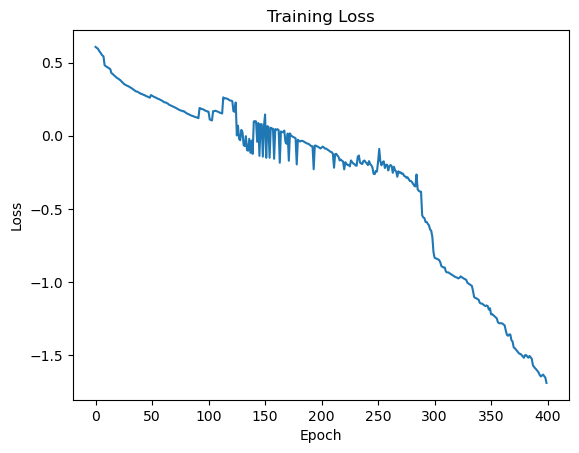

In [ ]:
# data
csv_file = 'data/two_insert_cir.csv'
data = np.loadtxt(csv_file,delimiter=",")
data = torch.tensor(data)

torch.manual_seed(0)

sigma = 0.1  
noise = torch.randn_like(data) * sigma
data_1 = data + noise

projected_data = data_1[:,0]
projected_data = projected_data.view(len(data_1), 1)

# init parameters
n_comp = 6 #6
num_step = 400 #200
l1 = 1 
l2 = 1 #0.6

# GMM initialization
gmm = GaussianMixture(n_components=n_comp, covariance_type='full', n_init = 10,
                      max_iter= 1000,tol=1e-6,random_state = 0 )
gmm.fit(projected_data)
init_mean = torch.tensor(gmm.means_).view(-1)
init_var = torch.tensor(gmm.covariances_).view(-1)
init_weights = torch.tensor(gmm.weights_).view(-1)
db = DBSCAN(eps=0.2,  min_samples=5)
m = Opt_GMM_Mapper(n_comp, means = init_mean, covariances=init_var, weights=init_weights)
init_scheme = m.forward(projected_data, data_1, db)

# mapper before optimization
before_list_1 = m.mode_filtration_f.detach().numpy()
se_list_before_1 = get_intervals(m.mode_assignments, projected_data)
G_mode_before_1 = m.get_mode_graph()

# define optimizer and scheduler
optimizer = optim.SGD(m.parameters(), lr=0.002, momentum=0.5)
scheduler = lr_scheduler.StepLR(optimizer, step_size=300, gamma=0.1)

# train
train = Trainer(m, db, num_step, optimizer, scheduler)
train.fit(data_1, projected_data, l1, l2)
train.analysis()

# loss plot
plt.plot(train.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('figures/noise1_loss.eps', bbox_inches='tight')
plt.show()

# mapper after optimization
after_list_1 = m.mode_filtration_f.detach().numpy()
se_list_after_1 = get_intervals(m.mode_assignments, projected_data)
G_mode_after_1 = m.get_mode_graph()

#plt.scatter(data[:,0], data[:,1],s=1)
#plt.set_aspect('equal', adjustable='box')
plt.show()

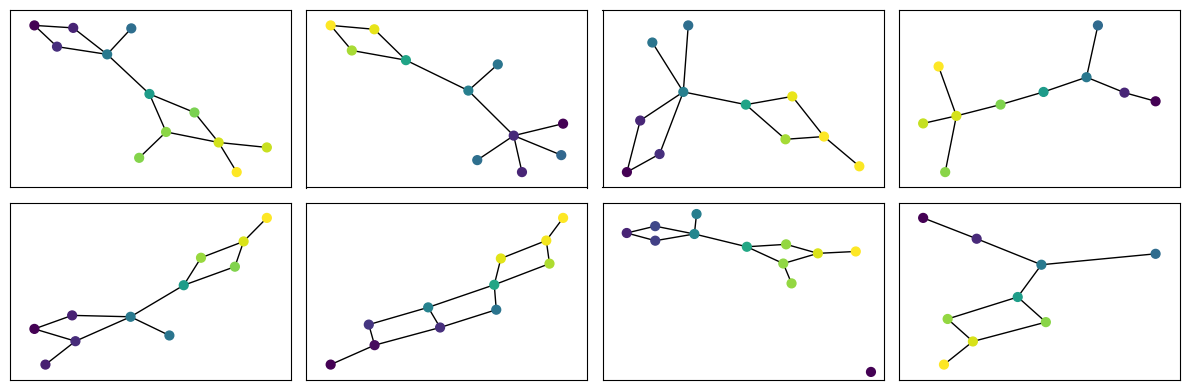

In [3]:
G_list = m.sample(8, train.scheme)

plt.figure(figsize=(12, 4))
for i, G in enumerate(G_list):
    ax = plt.subplot(2, 4, i+1)  
    pos = nx.spring_layout(G)  
    filtration_k = m.sample_filtration[i]
    filtration_k = filtration_k[~torch.isnan(filtration_k)]

    nx.draw_networkx(G, pos, with_labels=False,node_color = filtration_k,node_size = 40)
    ax.set_xticks([]) 
    ax.set_yticks([])  

plt.tight_layout()
plt.savefig('figures/noise1.eps', bbox_inches='tight')

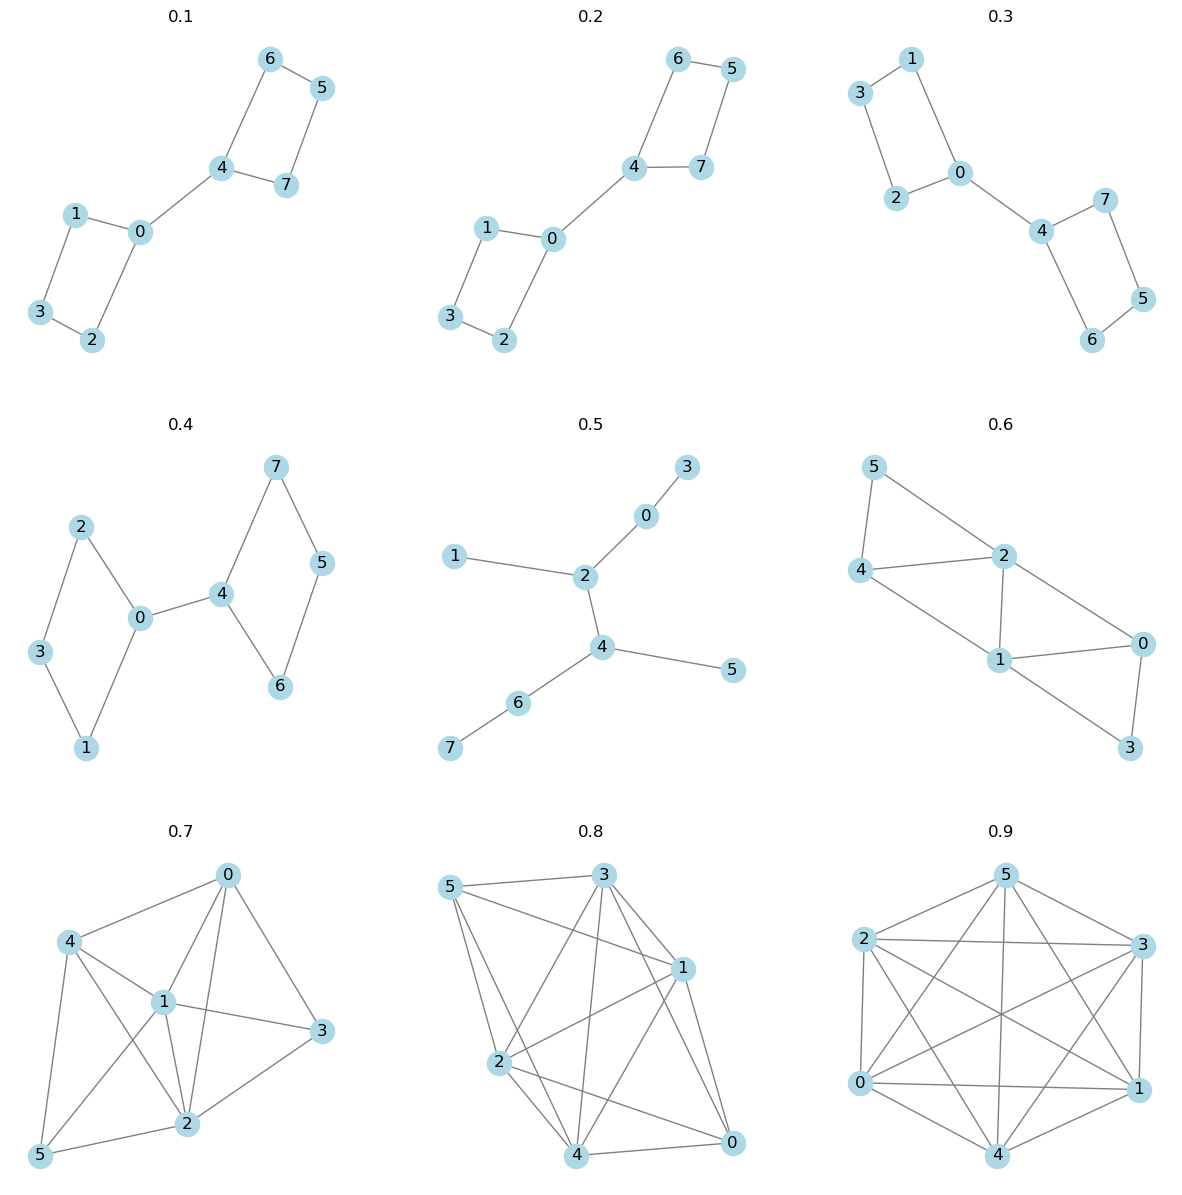

tensor(0.5060, dtype=torch.float64)


In [4]:
get_all_Mapper(data_1, projected_data, n_comp, db)
mapper_1 = MapperComplex(
resolutions=n_comp,
gains=0.4,
clustering=db,
)
mapper_1.fit(data_1, filters=projected_data.numpy(),colors=projected_data.numpy())
se_list_regular_1 = get_regular_intervals([projected_data.min(),projected_data.max()], n_comp, 0.4)
G_1 = mapper_1.get_networkx()

# big noise

100%|██████████| 300/300 [00:13<00:00, 22.99it/s]


loss: -0.10404614140420221
topo_loss: -1.6742648907956312
mode:
Indices of rows that are all zeros: (tensor([], dtype=torch.int64),)


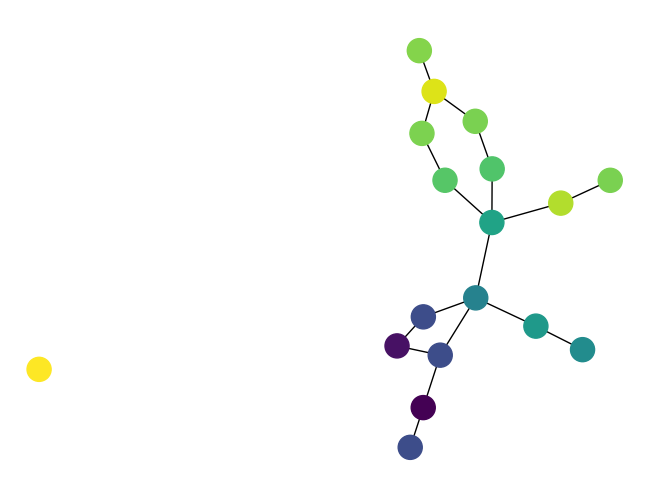

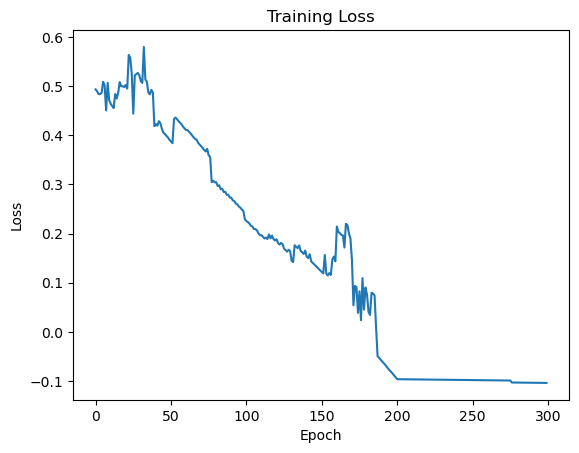

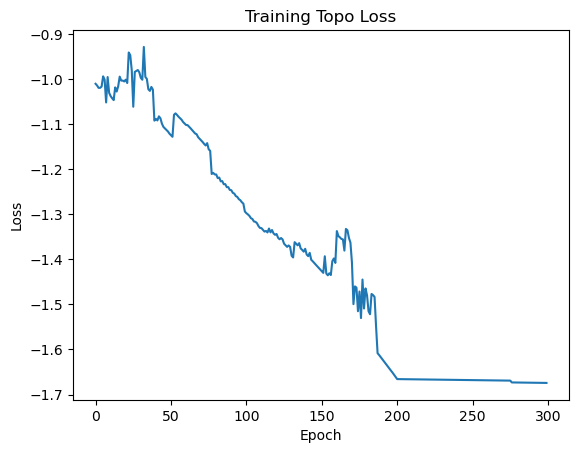

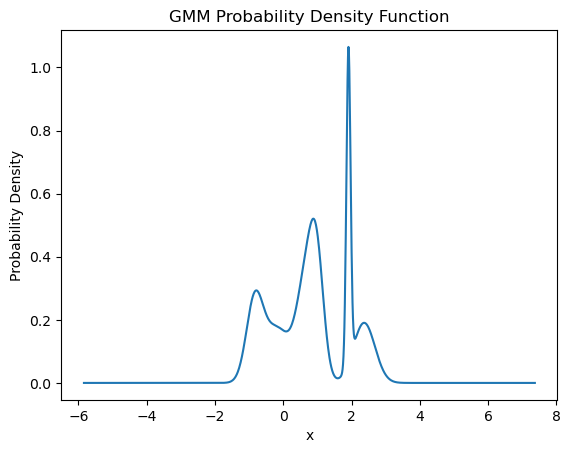

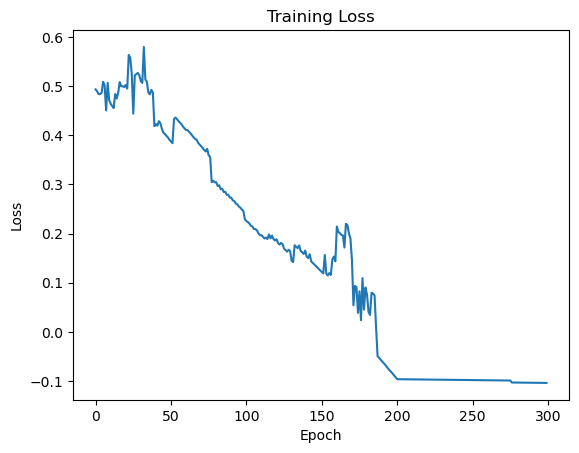

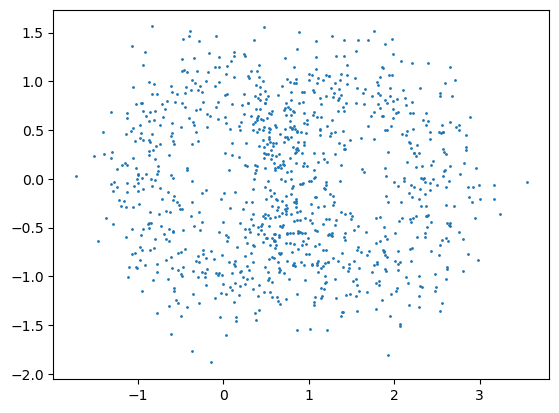

In [5]:
# data
csv_file = 'data/two_insert_cir.csv'
data = np.loadtxt(csv_file,delimiter=",")
data = torch.tensor(data)

# 添加高斯噪声
seed = 42
torch.manual_seed(seed)

sigma = 0.3  # 噪声的标准差
noise = torch.randn_like(data) * sigma
data = data + noise

projected_data = data[:,0]
projected_data = projected_data.view(len(data), 1)

# init parameters
n_comp = 6 #6
num_step = 300 #200
l1 = 1 
l2 = 1 #0.6

# GMM initialization
gmm = GaussianMixture(n_components=n_comp, covariance_type='full', n_init = 10,
                      max_iter= 1000,tol=1e-6,random_state = 0 )
gmm.fit(projected_data)
init_mean = torch.tensor(gmm.means_).view(-1)
init_var = torch.tensor(gmm.covariances_).view(-1)
init_weights = torch.tensor(gmm.weights_).view(-1)
db = DBSCAN(eps=0.2,  min_samples=5)
m = Opt_GMM_Mapper(n_comp, means = init_mean, covariances=init_var, weights=init_weights)
init_scheme = m.forward(projected_data, data, db)

# mapper before optimization
before_list_2 = m.mode_filtration_f.detach().numpy()
se_list_before_2 = get_intervals(m.mode_assignments, projected_data)
G_mode_before_2 = m.get_mode_graph()

# define optimizer and scheduler
optimizer = optim.SGD(m.parameters(), lr=0.001, momentum=0.5)
scheduler = lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.01)

# train
train = Trainer(m, db, num_step, optimizer, scheduler)
train.fit(data, projected_data, l1, l2)
train.analysis()

# loss plot
plt.plot(train.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('figures/noise2_loss.eps', bbox_inches='tight')
plt.show()

# mapper after optimization
after_list_2 = m.mode_filtration_f.detach().numpy()
se_list_after_2 = get_intervals(m.mode_assignments, projected_data)
G_mode_after_2 = m.get_mode_graph()

plt.scatter(data[:,0], data[:,1],s=1)
#plt.set_aspect('equal', adjustable='box')
plt.show()

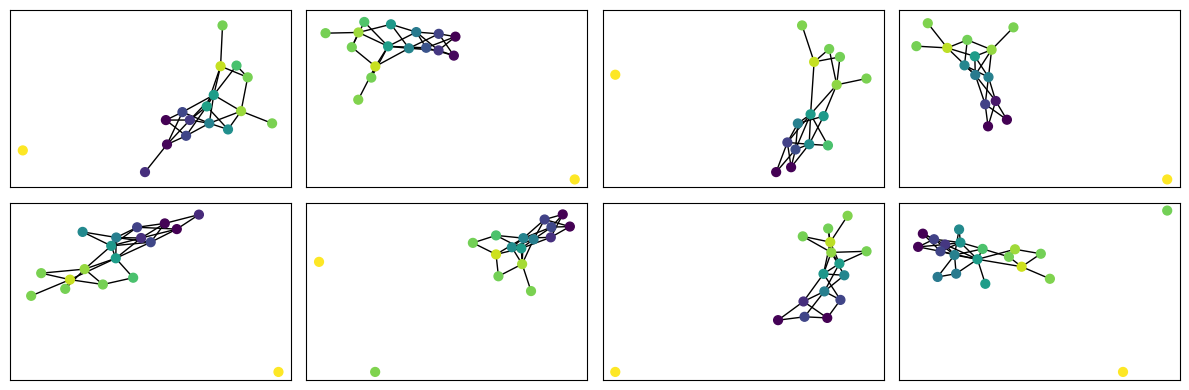

In [6]:
G_list = m.sample(8, train.scheme)

plt.figure(figsize=(12, 4))
for i, G in enumerate(G_list):
    ax = plt.subplot(2, 4, i+1)  
    pos = nx.spring_layout(G)  
    filtration_k = m.sample_filtration[i]
    filtration_k = filtration_k[~torch.isnan(filtration_k)]

    nx.draw_networkx(G, pos, with_labels=False,node_color = filtration_k,node_size = 40)
    ax.set_xticks([]) 
    ax.set_yticks([])  

plt.tight_layout()
plt.savefig('figures/noise2.eps', bbox_inches='tight')

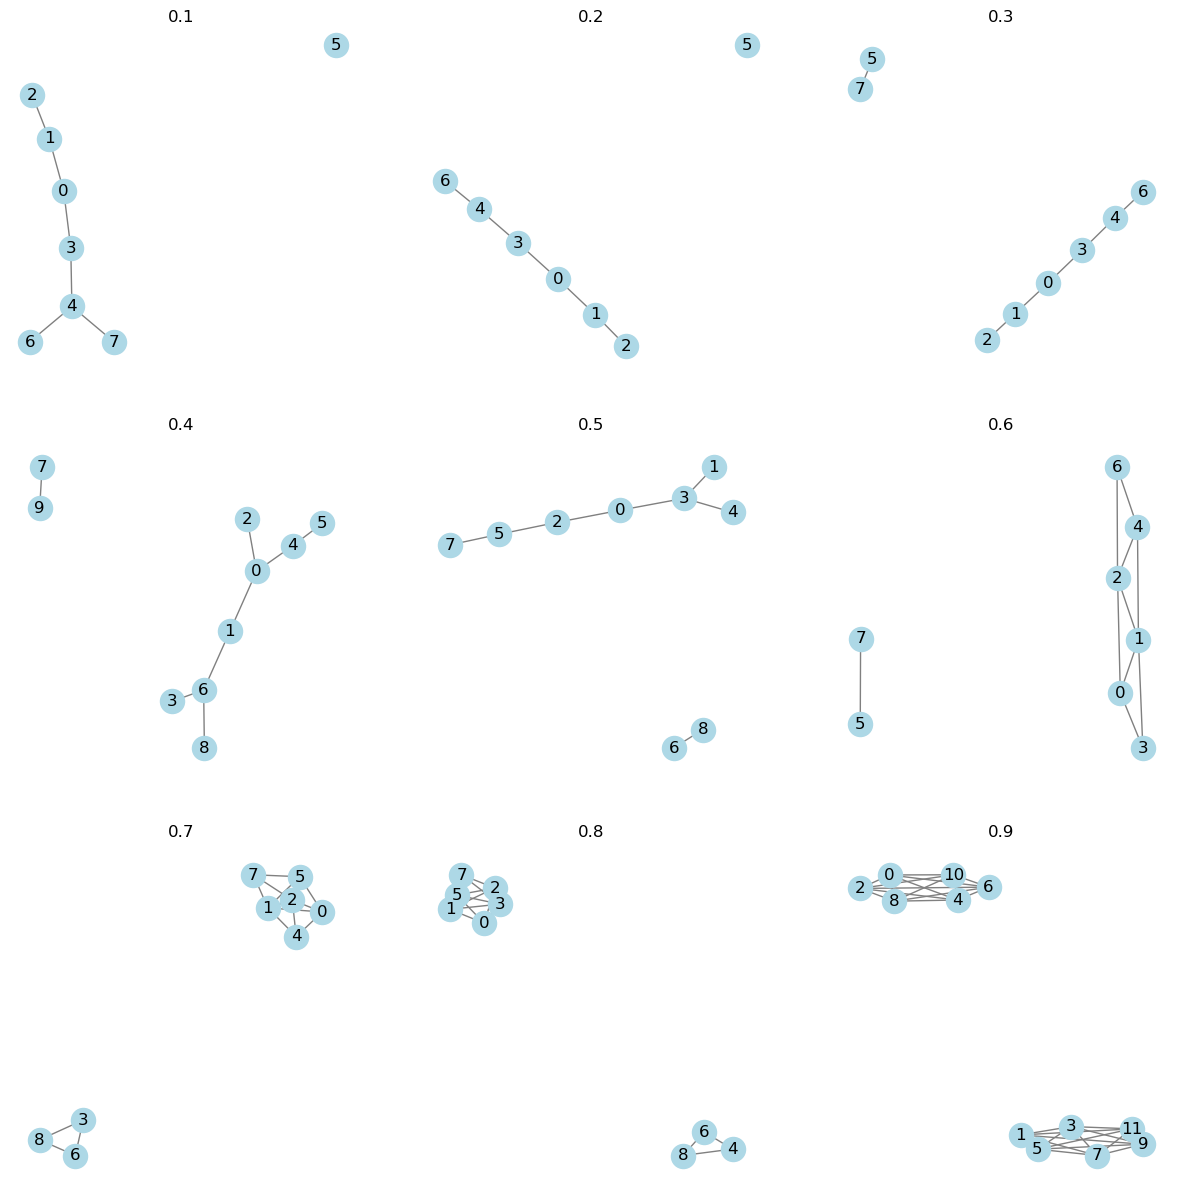

In [7]:
get_all_Mapper(data, projected_data, n_comp, db)

In [8]:
mapper_2 = MapperComplex(
resolutions=n_comp,
gains=0.4,
clustering=db,
)
mapper_2.fit(data, filters=projected_data.numpy(),colors=projected_data.numpy())
se_list_regular_2 = get_regular_intervals([projected_data.min(),projected_data.max()], n_comp, 0.4)
G_2 = mapper_2.get_networkx()

'''fig = plt.figure(figsize=(8, 10),dpi=350) 

ax = fig.add_axes([0, 0.75, 0.5, 0.25])
ax.scatter(data[:,0], data[:,1], c='#7195c5',s=1, marker='o')
ax.axis('on')
ax.set_title("(a) Two inserting circles with nosie dataset",fontsize=10)
ax.axis('equal')

pos = nx.kamada_kawai_layout(G)
ax2 = fig.add_axes([0.5, 0.75,0.5,0.25])
ax2.set_title('(b) Standard Mapper graph',fontsize=10)
nx.draw(G, pos = pos, 
        node_color=[mapper.node_info_[v]["colors"][0] for v in G.nodes()], node_size = 100,
        ax=ax2)

pos = nx.spring_layout(G_mode_before_2ic)
ax3 = fig.add_axes([0, 0.45, 0.5,0.22])
ax3.set_title('(c) Mode Mapper graph without optimization',fontsize=10)
nx.draw(G_mode_before_2ic, pos = pos, 
        node_color=before_list_2ic, node_size = 100, 
        ax=ax3) 


ax4 = fig.add_axes([0.5, 0.45, 0.5 ,0.22])
pos = nx.spring_layout(G_mode_after_2ic)
ax4.set_title('(d) Mode Mapper graph with optimization',fontsize=10)
nx.draw(G_mode_after_2ic, pos = pos, 
        node_color=after_list_2ic, node_size = 100,
        ax=ax4)  

plt.savefig("figures/2inc_all.eps", bbox_inches='tight')
plt.show()'''

tensor(0.6594, dtype=torch.float64)


'fig = plt.figure(figsize=(8, 10),dpi=350) \n\nax = fig.add_axes([0, 0.75, 0.5, 0.25])\nax.scatter(data[:,0], data[:,1], c=\'#7195c5\',s=1, marker=\'o\')\nax.axis(\'on\')\nax.set_title("(a) Two inserting circles with nosie dataset",fontsize=10)\nax.axis(\'equal\')\n\npos = nx.kamada_kawai_layout(G)\nax2 = fig.add_axes([0.5, 0.75,0.5,0.25])\nax2.set_title(\'(b) Standard Mapper graph\',fontsize=10)\nnx.draw(G, pos = pos, \n        node_color=[mapper.node_info_[v]["colors"][0] for v in G.nodes()], node_size = 100,\n        ax=ax2)\n\npos = nx.spring_layout(G_mode_before_2ic)\nax3 = fig.add_axes([0, 0.45, 0.5,0.22])\nax3.set_title(\'(c) Mode Mapper graph without optimization\',fontsize=10)\nnx.draw(G_mode_before_2ic, pos = pos, \n        node_color=before_list_2ic, node_size = 100, \n        ax=ax3) \n\n\nax4 = fig.add_axes([0.5, 0.45, 0.5 ,0.22])\npos = nx.spring_layout(G_mode_after_2ic)\nax4.set_title(\'(d) Mode Mapper graph with optimization\',fontsize=10)\nnx.draw(G_mode_after_2ic, pos

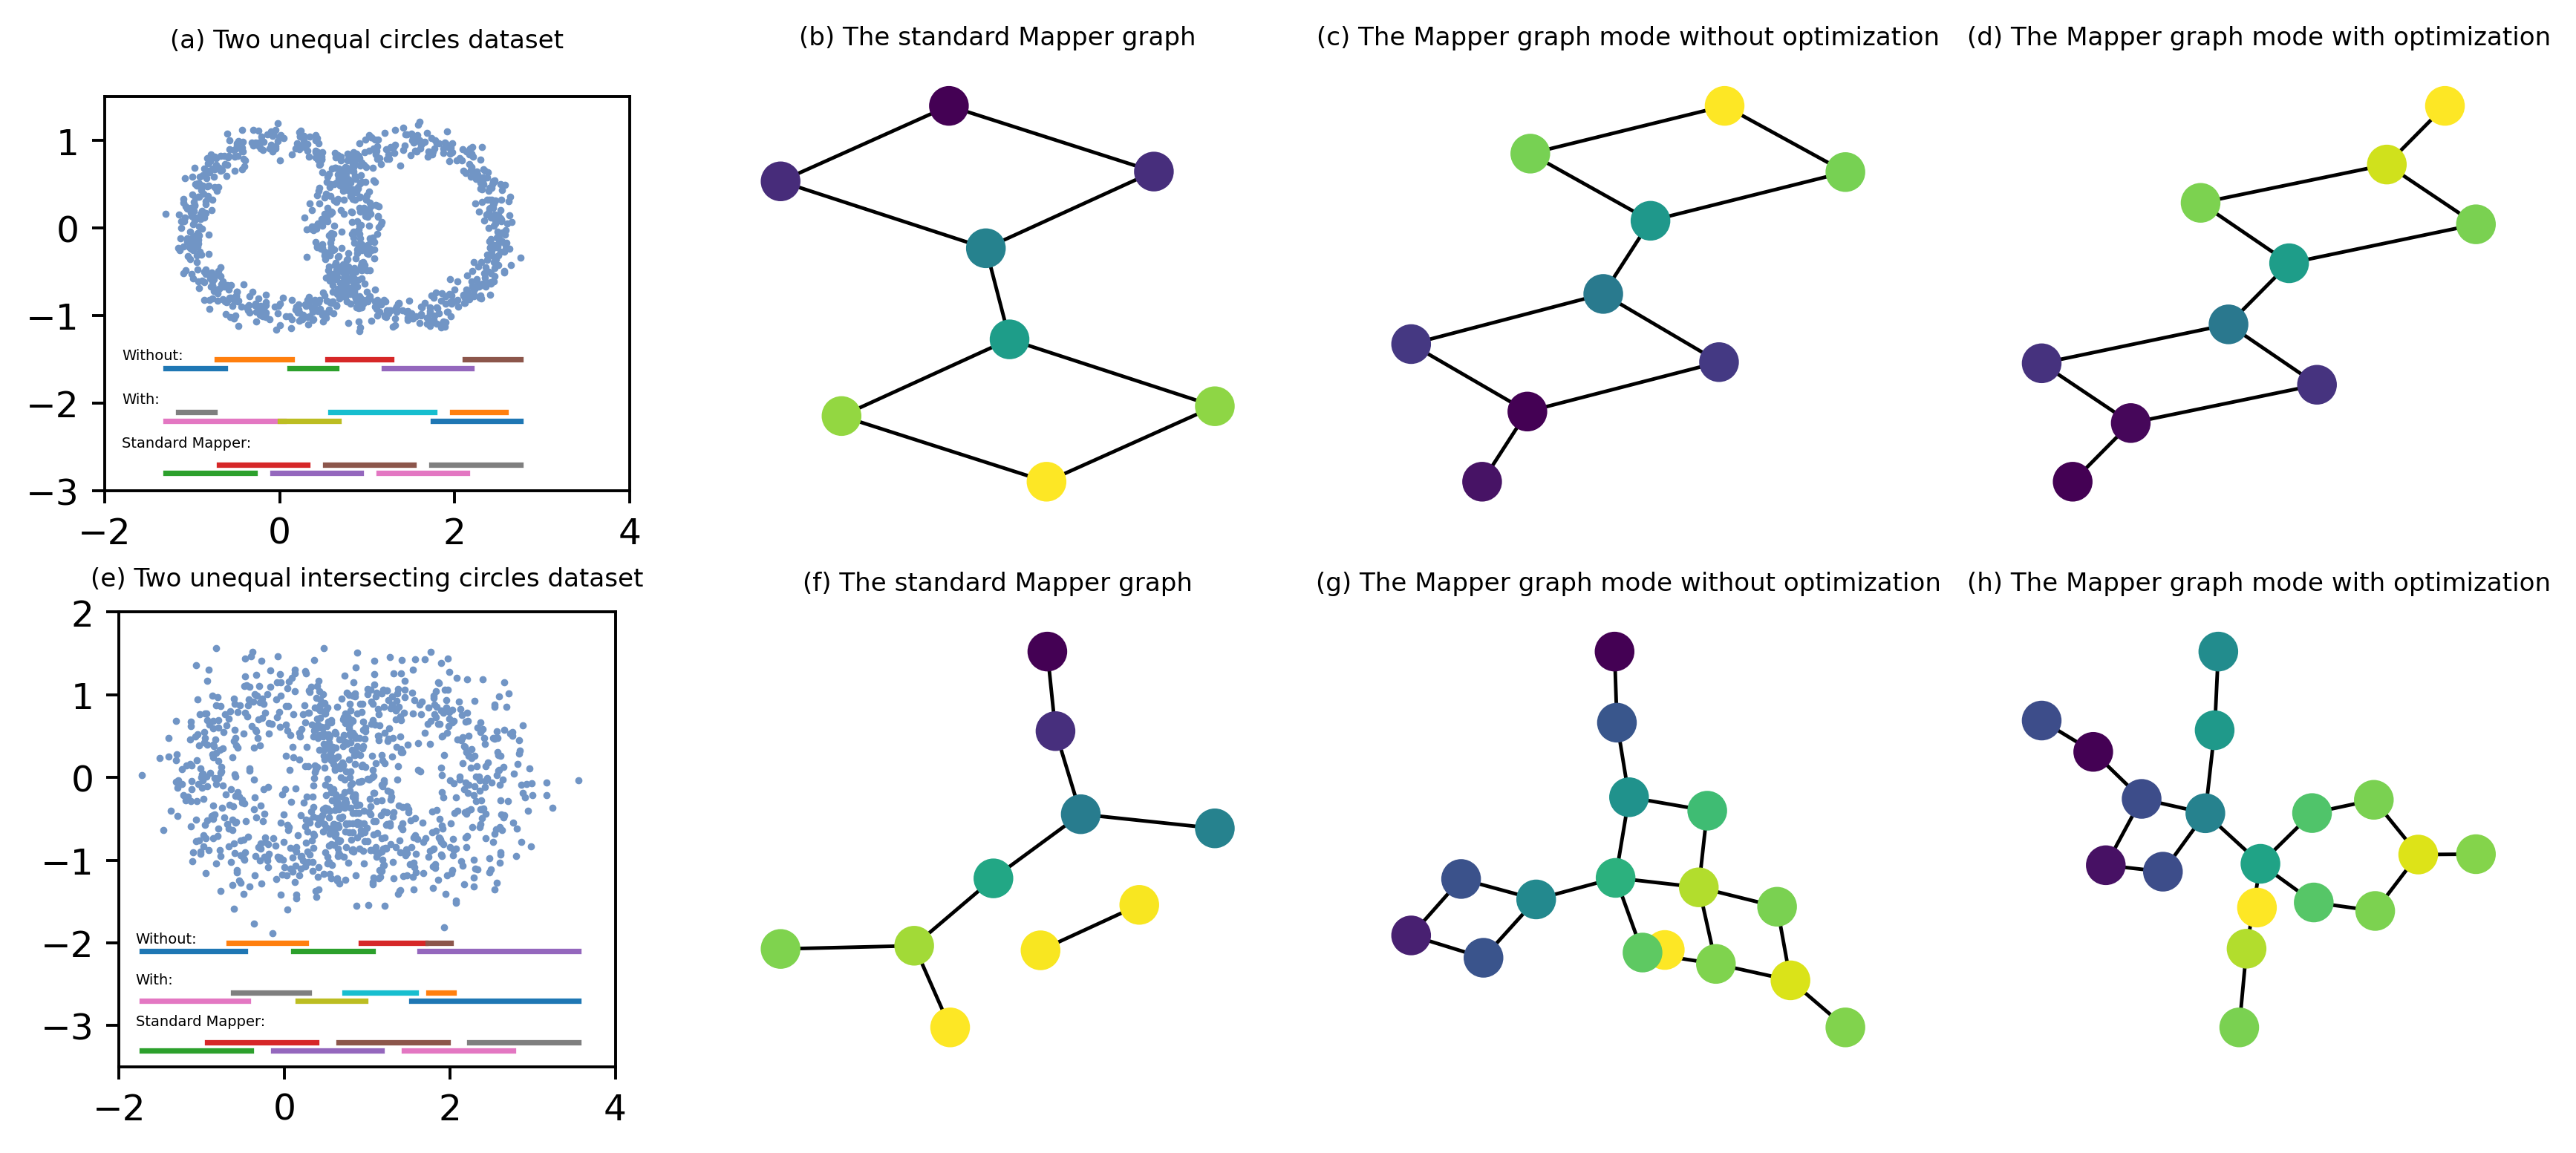

In [9]:
n_size = 100 # node size 

fig, axs = plt.subplots(2, 4) 
fig.set_size_inches(12, 5)  
fig.dpi = 350  

axs[0, 0].scatter(data_1[:,0], data_1[:,1],s = 1,c='#7195c5')
axs[0, 0].set_xlim((-2, 4))
axs[0, 0].set_ylim((-3, 1.5))
axs[0, 0].set_aspect('equal', adjustable='box')

for i,se in enumerate(se_list_before_1):
    s,e = se[0], se[1]
    axs[0, 0].plot([s,e],[0.1*(i % 2)-1.6,0.1*(i % 2)-1.6])

for i,se in enumerate(se_list_after_1):
    s,e = se[0], se[1]
    axs[0, 0].plot([s,e],[0.1*(i % 2)-2.2,0.1*(i % 2)-2.2])

for i,se in enumerate(se_list_regular_1):
    s,e = se[0], se[1]
    axs[0, 0].plot([s,e],[0.1*(i % 2)-2.8,0.1*(i % 2)-2.8])

axs[0, 0].text(-1.8, -1.5, 'Without:', fontsize=4) 
axs[0, 0].text(-1.8, -2, 'With:', fontsize=4) 
axs[0, 0].text(-1.8, -2.5, 'Standard Mapper:', fontsize=4) 

nx.draw(G_1, pos = nx.kamada_kawai_layout(G_1), 
        node_color=[mapper_1.node_info_[v]["colors"][0] for v in G_1.nodes()], 
        ax=axs[0, 1], node_size=n_size)

pos = {3: np.array([0.1,  0.9 ]), 2: np.array([0.3 , 0.9]), 1: np.array([ 0.02063238, 0.9]), 
       0: np.array([-0.20223454, 0.9]), 6: np.array([-0.1, 0.8]), 5: np.array([0.2, 1.        ]), 
       4: np.array([0.2, 0.8]), 7: np.array([-0.1, 1])}

nx.draw(G_mode_before_1, pos = nx.kamada_kawai_layout(G_mode_before_1),
        node_color=before_list_1,
        ax=axs[0, 2], node_size=n_size)

nx.draw(G_mode_after_1, pos = nx.kamada_kawai_layout(G_mode_after_1),
        node_color=after_list_1,
        ax=axs[0, 3], node_size=n_size)

# 2ic
axs[1, 0].scatter(data[:,0],data[:,1],s=1,c='#7195c5')
axs[1, 0].set_xlim((-2, 4))
axs[1, 0].set_ylim((-3.5, 2))
axs[1, 0].set_aspect('equal', adjustable='box')

for i,se in enumerate(se_list_before_2):
    s,e = se[0], se[1]
    axs[1, 0].plot([s,e],[0.1*(i % 2)-2.1,0.1*(i % 2)-2.1])

for i,se in enumerate(se_list_after_2):
    s,e = se[0], se[1]
    axs[1, 0].plot([s,e],[0.1*(i % 2)-2.7, 0.1*(i % 2)-2.7])

for i,se in enumerate(se_list_regular_2):
    s,e = se[0], se[1]
    axs[1, 0].plot([s,e],[0.1*(i % 2)-3.3,0.1*(i % 2)-3.3])

axs[1, 0].text(-1.8, -2, 'Without:', fontsize=4) 
axs[1, 0].text(-1.8, -2.5, 'With:', fontsize=4) 
axs[1, 0].text(-1.8, -3, 'Standard Mapper:', fontsize=4) 


nx.draw(G_2, pos = nx.kamada_kawai_layout(G_2), 
        node_color=[mapper_2.node_info_[v]["colors"][0] for v in G_2.nodes()], 
        ax=axs[1, 1], node_size=n_size)


nx.draw(G_mode_before_2, pos = nx.kamada_kawai_layout(G_mode_before_2),
        node_color = before_list_2,
        ax=axs[1, 2], node_size=n_size)

nx.draw(G_mode_after_2, pos = nx.kamada_kawai_layout(G_mode_after_2), #nx.spring_layout(G_mode_after_2ic)
        node_color = after_list_2,
        ax=axs[1, 3], node_size=n_size)

title_y = 1.0
title_fontsize = 7
axs[0, 0].set_title('(a) Two unequal circles dataset', y=1.07, fontsize=title_fontsize)
axs[0, 1].set_title('(b) The standard Mapper graph', y=title_y, fontsize=title_fontsize)
axs[0, 2].set_title('(c) The Mapper graph mode without optimization', y=title_y, fontsize=title_fontsize)
axs[0, 3].set_title('(d) The Mapper graph mode with optimization', y=title_y, fontsize=title_fontsize)
axs[1, 0].set_title('(e) Two unequal intersecting circles dataset', y=1.01, fontsize=title_fontsize)
axs[1, 1].set_title('(f) The standard Mapper graph', y=title_y, fontsize=title_fontsize)
axs[1, 2].set_title('(g) The Mapper graph mode without optimization', y=title_y, fontsize=title_fontsize)
axs[1, 3].set_title('(h) The Mapper graph mode with optimization', y=title_y, fontsize=title_fontsize)

plt.savefig("figures/ex3_all.eps", bbox_inches='tight')